# Z-score mehode


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"/home/ahmed/Ai/Feature-engineering/DataSets/placement.csv")
df

/tmp/ipykernel_302843/3897488789.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


### how to detect outliers ?

##### 1) if data is not on the Normal dsitribution

##### 2) or you can use box plot to see the outliers

##### 3) The skew of the data


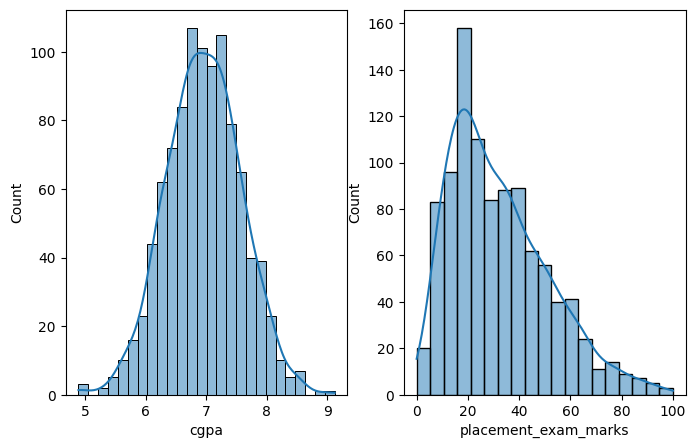

In [2]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

sns.histplot(df["cgpa"], kde=True, ax=ax[0])
sns.histplot(df["placement_exam_marks"], kde=True, ax=ax[1])
plt.show()

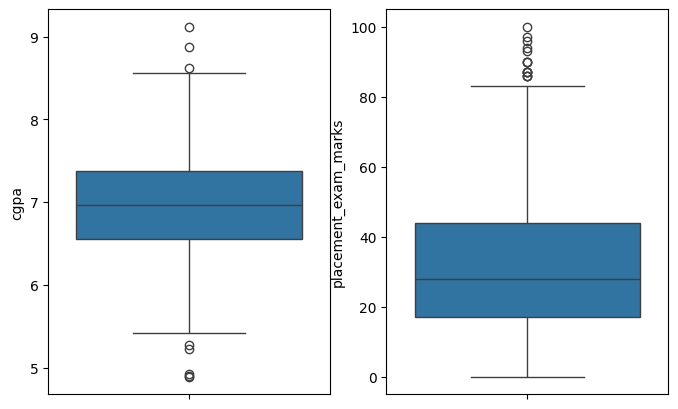

In [32]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

sns.boxplot(df["cgpa"], ax=ax[0])
sns.boxplot(df["placement_exam_marks"], ax=ax[1])
plt.show()

In [4]:
df["placement_exam_marks"].skew(), df["cgpa"].skew()

(0.8356419499466834, -0.014529938929314918)

In [5]:
lower_limit = df["cgpa"].mean() - 3 * df["cgpa"].std()
upper_limit = df["cgpa"].mean() + 3 * df["cgpa"].std()
df_without_outliers = df[(df["cgpa"] > lower_limit) & (df["cgpa"] < upper_limit)]
lower_limit = df["placement_exam_marks"].mean() - 3 * df["placement_exam_marks"].std()
upper_limit = df["placement_exam_marks"].mean() + 3 * df["placement_exam_marks"].std()

df_without_outliers = df[
    (df["placement_exam_marks"] > lower_limit)
    & (df["placement_exam_marks"] < upper_limit)
]

len(df) - len(df_without_outliers)

8

##### or use the z-socre formula dirctly


In [6]:
df_zsocre = df.copy()
df_zsocre["z-scorecgpa"] = (df_zsocre["cgpa"] - df_zsocre["cgpa"].mean()) / df_zsocre[
    "cgpa"
].std()
df_zsocre["z-scoreplacement_exam_marks"] = (
    df_zsocre["placement_exam_marks"] - df_zsocre["placement_exam_marks"].mean()
) / df_zsocre["placement_exam_marks"].std()

df_zsocre

,cgpa,placement_exam_marks,placed,z-scorecgpa,z-scoreplacement_exam_marks
0,7.19,26.0,1,0.371425,-0.325391
1,7.46,38.0,1,0.809810,0.301869
2,7.54,40.0,1,0.939701,0.406412
3,6.42,8.0,1,-0.878782,-1.266281
4,7.23,17.0,0,0.436371,-0.795836
...,...,...,...,...,...
995,8.87,44.0,1,3.099150,0.615499
996,9.12,65.0,1,3.505062,1.713204
997,4.89,34.0,0,-3.362960,0.092782
998,8.62,46.0,1,2.693239,0.720042


In [7]:
df_zsocre = df_zsocre[(df_zsocre["z-scorecgpa"] > -3) & (df_zsocre["z-scorecgpa"] < 3)]
df_zsocre = df_zsocre[
    (df_zsocre["z-scoreplacement_exam_marks"] > -3)
    & (df_zsocre["z-scoreplacement_exam_marks"] < 3)
]
df_zsocre.drop(columns=["z-scorecgpa", "z-scoreplacement_exam_marks"])

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


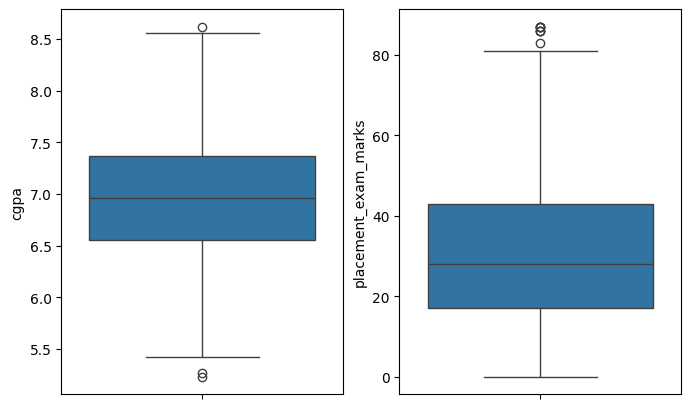

In [8]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

sns.boxplot(df_zsocre["cgpa"], ax=ax[0])
sns.boxplot(df_zsocre["placement_exam_marks"], ax=ax[1])
plt.show()

# IQR Method


In [9]:
IQR_df = df.copy()
Q1 = IQR_df["placement_exam_marks"].quantile(0.25)
Q2 = IQR_df["placement_exam_marks"].quantile(0.75)
iqr = Q2 - Q1
lower_limit = Q1 - 1.5 * iqr
upper_limit = Q2 + 1.5 * iqr
IQR_df = IQR_df[
    (IQR_df["placement_exam_marks"] > lower_limit)
    & (IQR_df["placement_exam_marks"] < upper_limit)
]

Q1 = IQR_df["cgpa"].quantile(0.25)
Q2 = IQR_df["cgpa"].quantile(0.75)
iqr = Q2 - Q1
lower_limit = Q1 - 1.5 * iqr
upper_limit = Q2 + 1.5 * iqr
IQR_df = IQR_df[(IQR_df["cgpa"] > lower_limit) & (IQR_df["cgpa"] < upper_limit)]

print(len(df) - len(IQR_df))
print(iqr)

23
0.8200000000000003


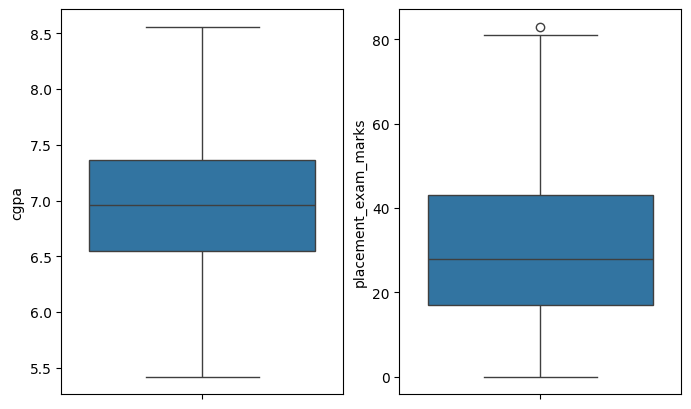

In [10]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

sns.boxplot(IQR_df["cgpa"], ax=ax[0])
sns.boxplot(IQR_df["placement_exam_marks"], ax=ax[1])
plt.show()

# percentiles method


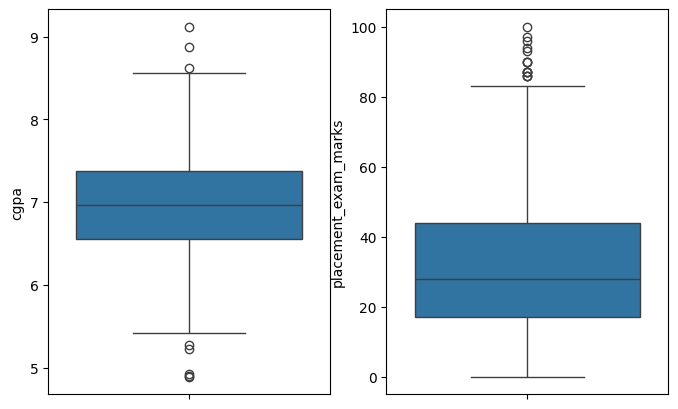

5.41925 8.560180000000003
3.0 76.0


In [41]:
percentil_df = df.copy()
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

sns.boxplot(percentil_df["cgpa"], ax=ax[0])
sns.boxplot(percentil_df["placement_exam_marks"], ax=ax[1])
plt.show()
print(percentil_df["cgpa"].quantile(0.005), percentil_df["cgpa"].quantile(0.997))
print(
    percentil_df["placement_exam_marks"].quantile(0.005),
    percentil_df["placement_exam_marks"].quantile(0.97),
)

In [42]:
Q1 = percentil_df["cgpa"].quantile(0.005)
Q2 = percentil_df["cgpa"].quantile(0.997)
percentil_df = percentil_df[(percentil_df["cgpa"] > Q1) & ((percentil_df["cgpa"]) < Q2)]

Q1 = percentil_df["placement_exam_marks"].quantile(0.005)
Q2 = percentil_df["placement_exam_marks"].quantile(0.97)
percentil_df = percentil_df[
    (percentil_df["placement_exam_marks"] > Q1)
    & ((percentil_df["placement_exam_marks"]) < Q2)
]
percentil_df

,cgpa,placement_exam_marks,placed,z-scorecgpa,z-scoreplacement_exam_marks
0,7.19,26.0,1,0.371425,-0.325391
1,7.46,38.0,1,0.809810,0.301869
2,7.54,40.0,1,0.939701,0.406412
3,6.42,8.0,1,-0.878782,-1.266281
4,7.23,17.0,0,0.436371,-0.795836
...,...,...,...,...,...
990,6.17,33.0,1,-1.284694,0.040511
991,7.04,57.0,0,0.127878,1.295031
992,6.26,12.0,0,-1.138565,-1.057194
993,6.73,21.0,1,-0.375452,-0.586749


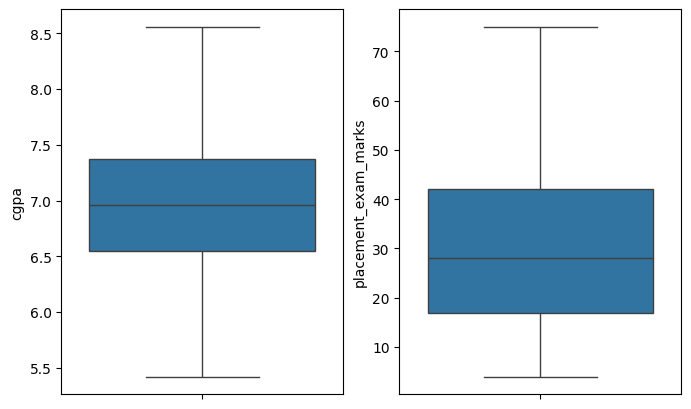

In [43]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

sns.boxplot(percentil_df["cgpa"], ax=ax[0])
sns.boxplot(percentil_df["placement_exam_marks"], ax=ax[1])
plt.show()